# Data Cleaning

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

## What is the data and how does it look like?

In [2]:
df=pd.read_csv('Stress-Lysis.csv')
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [3]:
df.sample(5)

,Humidity,Temperature,Step count,Stress Level
152,29.94,98.94,194,2
1818,19.86,88.86,128,1
834,19.98,88.98,102,1
230,15.43,84.43,88,1
838,28.21,97.21,163,2


## Size of dataset

In [4]:
print(df.shape)

(2001, 4)


## Info of features in data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


## Checking and Handling Null Values

In [6]:
df.isnull().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [7]:
df.isnull()

,Humidity,Temperature,Step count,Stress Level
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1996,False,False,False,False
1997,False,False,False,False
1998,False,False,False,False
1999,False,False,False,False


## Mathematical Perspective of the data

In [8]:
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [9]:
print(df['Stress Level'].unique().sum())

3


## Checking and Handling Duplicate values

In [10]:
df.duplicated().sum()

0

In [11]:
df=df.drop_duplicates()
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


## Correlation between the columns

### Numerical

In [12]:
df.corr()

,Humidity,Temperature,Step count,Stress Level
Humidity,1.000000,1.000000,0.870486,0.936036
Temperature,1.000000,1.000000,0.870486,0.936036
Step count,0.870486,0.870486,1.000000,0.832623
Stress Level,0.936036,0.936036,0.832623,1.000000


In [13]:
df.corr()['Stress Level']

Humidity        0.936036
Temperature     0.936036
Step count      0.832623
Stress Level    1.000000
Name: Stress Level, dtype: float64

### Heatmap for visualization of Correlation

<AxesSubplot:>

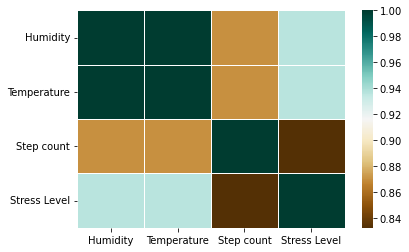

In [14]:
sns.heatmap(df.corr(),cmap='BrBG',linewidths=.5)

## Renaming columns

In [15]:
df=df.rename(columns={'Stress Level':'Stress'},inplace=False)
df=df.rename(columns={'Step count':'Steps'},inplace=False)
df.head()

,Humidity,Temperature,Steps,Stress
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


# EDA

## Univariate Analysis

### Categorical

What is the frequency of each category in the particular feature

<AxesSubplot:xlabel='Stress', ylabel='count'>

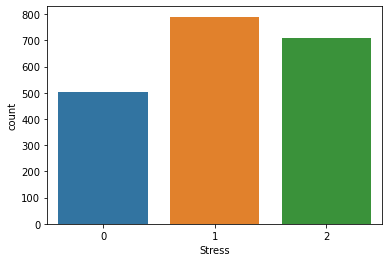

In [16]:
sns.countplot(x = df['Stress'])

<AxesSubplot:ylabel='Stress'>

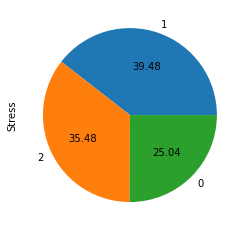

In [17]:
df['Stress'].value_counts().plot(kind='pie',autopct='%.2f')

Percentage distribution in piechart form can be viewed for different categories in the feature.

### Numerical

(array([10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,
         0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,
         0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,
         0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0.,
        10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0.,
        10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,
         0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,
         0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,
         0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0.,
        10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0.,
        10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,
         0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,
         0., 10.,  0.,  0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.,  0.,
         0., 10.,  0., 10.,  0.,  0., 10.,  0., 10.

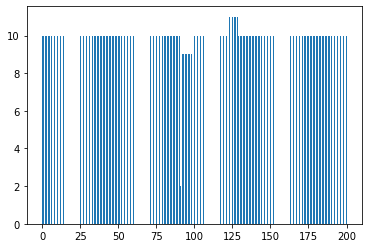

In [18]:
plt.hist(df['Steps'],bins=500)

(array([501.,   0.,   0.,   0.,   0., 790.,   0.,   0.,   0., 710.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

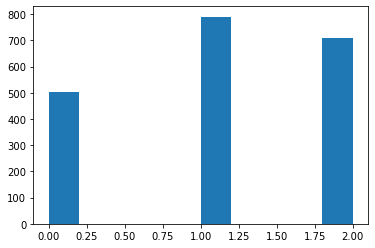

In [19]:
plt.hist(df['Stress'],bins=10)

## Bi-Variate Analysis & Multivariate Analysis

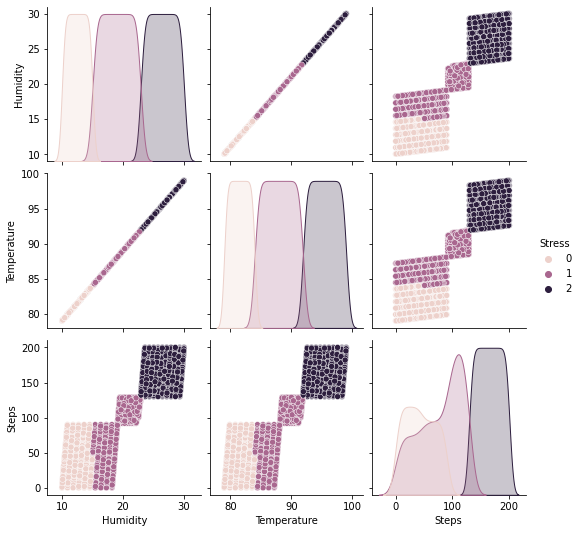

In [20]:
sns.pairplot(df,hue='Stress') 

## 80-20 Split Preparation

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Stress'])
Y = df['Stress']

## Normalizing the values

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
df1=pd.DataFrame(X,columns=['Humidity','Temp','Steps'])
df1

,Humidity,Temp,Steps
0,0.230248,0.230248,0.392972
1,0.244097,0.244097,-0.122772
2,1.232604,1.232604,1.647949
3,1.322626,1.322626,1.321311
4,-1.580572,-1.580572,-0.225920
...,...,...,...
1996,0.315076,0.315076,-0.071197
1997,-1.653282,-1.653282,-0.947962
1998,1.249916,1.249916,0.599270
1999,-1.305314,-1.305314,-0.621324


In [23]:
df.to_csv('E:\VIT\DAC\Input\preprocessed_data.csv')

## 80-20 Split

In [24]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.2)
train.reset_index(drop=True)
test.reset_index(drop=True)

,Humidity,Temperature,Steps,Stress
0,28.65,97.65,136,2
1,20.54,89.54,120,1
2,16.31,85.31,85,1
3,27.83,96.83,196,2
4,13.11,82.11,38,0
...,...,...,...,...
396,22.60,91.60,106,1
397,12.75,81.75,2,0
398,15.94,84.94,48,1
399,11.47,80.47,56,0


In [26]:
train.to_csv('../Input/train.csv')
test.to_csv('../Input/test.csv')